In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.python import keras 
from keras import layers, models, optimizers
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16 
import os, shutil, random 
import pandas as pd
import pprint 
from collections import defaultdict

In [5]:
import errno 


base_directory= "/workspaces/machinelearning/animaldata"
output_directory= "/workspaces/machinelearning/output"
os.mkdir(output_directory)

train_directory= os.path.join(output_directory, "train")
try:
    os.mkdir(train_directory)
except OSError as exc: 
    if exc.errno !=errno.EEXIST:
        raise
    pass
test_directory= os.path.join(output_directory, "test")
os.mkdir(test_directory)

validation_directory= os.path.join(output_directory, "validation")
os.mkdir(validation_directory)

train_cats_directory = os.path.join(train_directory, 'cats')
os.mkdir(train_cats_directory)
train_dogs_directory = os.path.join(train_directory, 'dogs')
os.mkdir(train_dogs_directory)

test_cats_directory = os.path.join(test_directory, 'cats')
os.mkdir(test_cats_directory)
test_dogs_directory = os.path.join(test_directory, 'dogs')
os.mkdir(test_dogs_directory)

validation_cats_directory = os.path.join(validation_directory, 'cats')
os.mkdir(validation_cats_directory)
validation_dogs_directory = os.path.join(validation_directory, 'dogs')
os.mkdir(validation_dogs_directory)


cat_directory= "/workspaces/machinelearning/animaldata/Cat"
dog_directory= "/workspaces/machinelearning/animaldata/Dog"

fnamestrain= ["{}.jpg". format(i) for i in range(8750)]
fnamestest= ["{}.jpg". format(i) for i in range(8750, 11250)]
fnamesval= ["{}.jpg". format(i) for i in range(11250, 12499)]

def Calc(src, dst): 
    if not os.path.exists(src):
        return 
    if os.path.getsize(src)==0:
        return 

    try:
        shutil.copyfile(src, dst)
    except Exception as e:
        print(f"Broken file", src)

for fname in fnamestrain:
    Calc(os.path.join(cat_directory, fname), os.path.join(train_cats_directory, fname))
for fname in fnamestest:
    Calc(os.path.join(cat_directory, fname), os.path.join(test_cats_directory, fname))

for fname in fnamesval:
    Calc(os.path.join(cat_directory, fname), os.path.join(validation_cats_directory, fname))


for fname in fnamestrain:
    Calc(os.path.join(dog_directory, fname), os.path.join(train_dogs_directory, fname))
for fname in fnamestest:
    Calc(os.path.join(dog_directory, fname), os.path.join(test_dogs_directory, fname))

for fname in fnamesval:
    Calc(os.path.join(dog_directory, fname), os.path.join(validation_dogs_directory, fname))


In [6]:
def conv_block(filters):
    return [ 
        layers.Conv2D(filters, (3,3), activation= "relu", padding="same" ), 
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2)
    ]
model= models.Sequential()
model.add(layers.Input(shape=(150, 150, 3)))

for f in [32, 64, 128, 128]:
    for layer in conv_block(f):
        model.add(layer)

model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", 
              optimizer= "adam",
              metrics= ["acc"])

2025-07-29 00:38:49.302834: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-07-29 00:38:50.023963: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21233664 exceeds 10% of free system memory.
2025-07-29 00:38:50.055414: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21233664 exceeds 10% of free system memory.
2025-07-29 00:38:50.063966: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21233664 exceeds 10% of free system memory.


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     5,308,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,551,681 (21.18 MB)

 Trainable params: 5,550,977 (21.18 MB)

 Non-trainable params: 704 (2.75 KB)

In [8]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(
    rescale=1./255,
    rotation_range= 40, 
    width_shift_range= 0.2, 
    height_shift_range= 0.2, 
    shear_range= 0.2,
    zoom_range=0.2, 
    horizontal_flip= True)
#makes image more readable with parameters

test_datagen= ImageDataGenerator(rescale=1./255)
train_generator= train_datagen.flow_from_directory(
    train_directory,
    target_size= (150, 150), 
    batch_size= 32, 
    class_mode= "binary", 
    classes=None, 
    subset= None
)
#is enacting the first chunk 

validation_generator= test_datagen.flow_from_directory(
    validation_directory, 
    target_size= (150, 150), 
    batch_size=32, 
    class_mode="binary", 
    classes= None, 
    subset= None
)

Found 17499 images belonging to 2 classes.
Found 2497 images belonging to 2 classes.


In [9]:
history=model.fit(
    train_generator, 
    steps_per_epoch= 30, 
    epochs= 10, 
    validation_data= validation_generator, 
    validation_steps= 157
)

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2025-07-29 00:38:53.835110: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21233664 exceeds 10% of free system memory.
2025-07-29 00:38:53.897600: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21233664 exceeds 10% of free system memory.


30/30 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - acc: 0.5801 - loss: 2.8433 - val_acc: 0.4958 - val_loss: 1.0613
Epoch 2/10


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


30/30 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - acc: 0.5782 - loss: 0.8310 - val_acc: 0.4962 - val_loss: 0.8772
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - acc: 0.6036 - loss: 0.6889 - val_acc: 0.4982 - val_loss: 2.0469
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - acc: 0.6008 - loss: 0.7314 - val_acc: 0.5002 - val_loss: 1.8760
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - acc: 0.6268 - loss: 0.6563 - val_acc: 0.5002 - val_loss: 0.9910
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - acc: 0.6170 - loss: 0.6478 - val_acc: 0.5006 - val_loss: 1.3735
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - acc: 0.6937 - loss: 0.5955 - val_acc: 0.5090 - val_loss: 0.7601
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - acc: 0.6230 - loss: 0.6310 - val_acc: 0.5294 - val_loss: 0.7012
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - acc: 0.6356 - loss: 0.6376 - val_acc: 0.5823 - val_loss: 0.6705
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - acc: 0.6979 - loss: 0.5959 - 

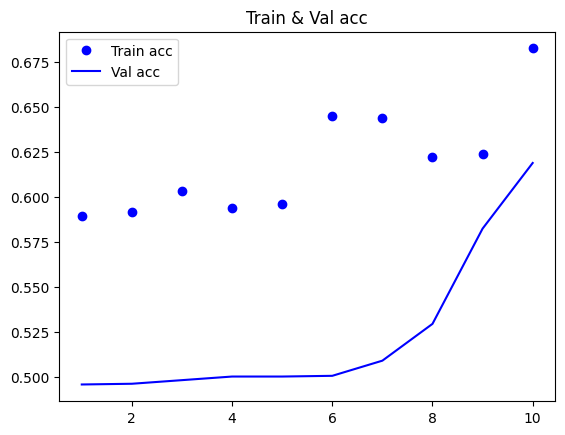

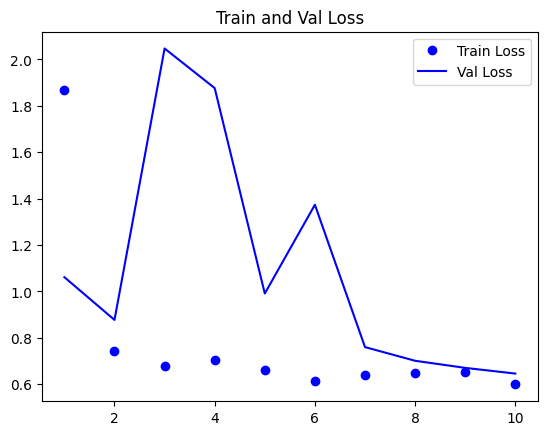

In [10]:
acc= history.history["acc"]
val_acc= history.history["val_acc"]
loss= history.history["loss"]
val_loss= history.history["val_loss"]

epochs= range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="Train acc")
plt.plot(epochs, val_acc, "b", label="Val acc")
plt.title("Train & Val acc")
plt.legend()
plt. figure()
plt.plot(epochs, loss, "bo", label="Train Loss")
plt.plot(epochs, val_loss, "b", label="Val Loss")
plt.title("Train and Val Loss")
plt.legend()
plt.show()